<a href="https://colab.research.google.com/github/CodexJoe/MechineLearning-/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [32]:
uploads = files.upload()

Saving iris.csv to iris (1).csv


In [33]:
data = pd.read_csv('iris.csv')

In [34]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
data['variety']=data['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2}) #Converting categorical to numerical so we can use knn

In [7]:

x=data[['sepal.length','sepal.width','petal.length','petal.width']]#Choosing the features as x and the target as y
y=data['variety']
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
x.shape

(150, 4)

In [9]:
y.shape

(150,)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


In [21]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))
print(scores)
    # Select the lowest odd number which as the highest accuracy

Accuracy for k= 1 is: 0.9
Accuracy for k= 2 is: 0.93
Accuracy for k= 3 is: 0.93
Accuracy for k= 4 is: 0.9
Accuracy for k= 5 is: 0.93
Accuracy for k= 6 is: 0.93
Accuracy for k= 7 is: 0.97
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 0.97
Accuracy for k= 23 is: 1.0
Accuracy for k= 24 is: 0.97
Accuracy for k= 25 is: 0.97
Accuracy for k= 26 is: 0.93
Accuracy for k= 27 is: 1.0
Accuracy for k= 28 is: 0.93
Accuracy for k= 29 is: 1.0
[0.9, 0.93, 0.93, 0.9, 0.93, 0.93, 0.97, 0.97, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97, 1.0, 0.97, 1.0, 0.97, 0.97, 0.93, 1.0, 0.93, 1.0]


In [22]:
y_pred #This prints the predicted values

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 2, 0, 1])

Text(0, 0.5, 'Testing Accuracy')

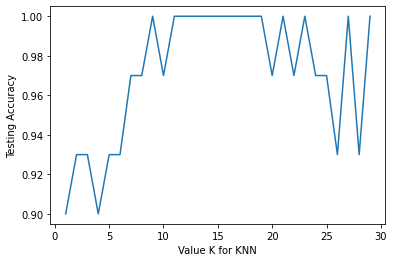

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [28]:
#Outliers

In [24]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data)) # Normalizes the data and convert them to positive(abs)
z

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.900681,1.019004,1.340227,1.315444,1.224745
1,1.143017,0.131979,1.340227,1.315444,1.224745
2,1.385353,0.328414,1.397064,1.315444,1.224745
3,1.506521,0.098217,1.283389,1.315444,1.224745
4,1.021849,1.249201,1.340227,1.315444,1.224745
...,...,...,...,...,...
145,1.038005,0.131979,0.819596,1.448832,1.224745
146,0.553333,1.282963,0.705921,0.922303,1.224745
147,0.795669,0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


In [25]:
outliers = list(set(np.where(z > 3)[0])) #gives number of outliers

len(outliers)

1

In [26]:
new_df = data.drop(outliers, axis = 0).reset_index(drop = False)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         149 non-null    int64  
 1   sepal.length  149 non-null    float64
 2   sepal.width   149 non-null    float64
 3   petal.length  149 non-null    float64
 4   petal.width   149 non-null    float64
 5   variety       149 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.1 KB


In [35]:
data.duplicated().sum() #Checking for Duplicate

1

In [36]:
data.drop_duplicates(inplace = True) #Dropping Duplicates

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
